In [1]:
import math

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': lambda x: '%6.2f' % x})

plt.style.use('seaborn')
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['font.family'] = 'serif'

In [2]:
def mc_simulation(S0, shape, T, r, sigma):
    """returns an array for which the rows are different simulations
       and the columns are timesteps

    S0: :float
        Initial price of option
    shape: :tuple
        Shape of output array, (number of simulations, time steps)
    T: :float
        Time to maturity of option, represented as fraction of a year (e.g. T=0.5 represents 6 months)
    sigma: :float
        Volatility of option over time period T
    r: :float
        Risk free interest rate

    returns 
    : :numpy.array
        The (0, 0) element is S0. Each column is a timestep, with the rows corresponding to the 
        binomial outcomes (or zeros). Moving to the right means the price increased, moving down and right means
        the price decreased. Only the upper triagular part of the matrix is valid, with the rest being zeros.
        Therefore, the 0th row corresponds to the price always increasing. The diagonal corresponds to the 
        price always decreasing. 
    """
    M, I = shape
    dt = T / M
    sqrt_dt = math.sqrt(dt)
    
    S = np.zeros((M + 1, I))
    
    S[0] = S0
    
    rn = np.random.standard_normal(S.shape)
    
    for t in range(1, M + 1):
        S[t] = S[t-1] * np.exp((r - sigma**2 / 2) * dt + sigma * sqrt_dt * rn[t])
        
    return S

Define the parameters needed to price the underlying asset at the time of maturity

In [3]:
S0 = 36
r = 0.06
T = 1
sigma = 0.2
shape = (100, 50000)

Simulate the stock price over the time period

In [4]:
S = mc_simulation(S0, shape, T, r, sigma)

array([[ 36.00,  36.00,  36.00, ...,  36.00,  36.00,  36.00],
       [ 36.08,  36.41,  35.10, ...,  36.59,  36.21,  37.34],
       [ 35.81,  35.96,  34.78, ...,  35.82,  36.48,  36.74],
       ...,
       [ 39.15,  32.58,  32.53, ...,  35.56,  30.58,  45.27],
       [ 37.62,  32.42,  32.57, ...,  35.67,  31.31,  44.96],
       [ 37.25,  33.07,  31.02, ...,  36.19,  30.90,  46.32]])

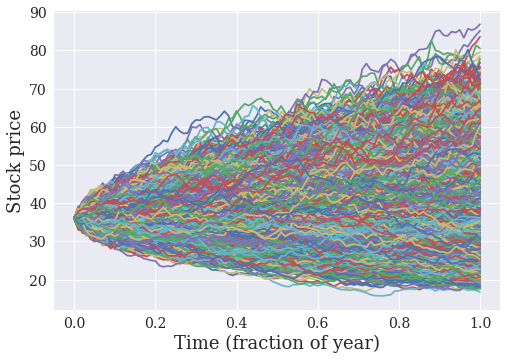

In [5]:
plt.plot(np.linspace(0, T, shape[0]+1), S)
plt.xlabel("Time (fraction of year)")
plt.ylabel("Stock price")
S

The mean value of the underlying asset at maturity

In [6]:
S[-1].mean()

38.27233554585799

If the strike price is 40, then C0 is the option price

In [7]:
K = 40
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()
C0

3.840522860899823

Histogram of the simulated asset prices at maturity

(array([  7.00,  16.00,  55.00, 155.00, 333.00, 576.00, 994.00, 1492.00,
        1964.00, 2588.00, 2979.00, 3411.00, 3610.00, 3873.00, 3718.00,
        3517.00, 3380.00, 3055.00, 2600.00, 2220.00, 1931.00, 1579.00,
        1286.00, 1080.00, 829.00, 648.00, 530.00, 392.00, 297.00, 233.00,
        168.00, 143.00,  84.00,  80.00,  45.00,  36.00,  31.00,  20.00,
         18.00,   9.00,   3.00,   5.00,   3.00,   1.00,   2.00,   1.00,
          0.00,   1.00,   1.00,   1.00]),
 array([ 16.75,  18.15,  19.55,  20.95,  22.36,  23.76,  25.16,  26.56,
         27.96,  29.37,  30.77,  32.17,  33.57,  34.97,  36.38,  37.78,
         39.18,  40.58,  41.98,  43.38,  44.79,  46.19,  47.59,  48.99,
         50.39,  51.80,  53.20,  54.60,  56.00,  57.40,  58.81,  60.21,
         61.61,  63.01,  64.41,  65.81,  67.22,  68.62,  70.02,  71.42,
         72.82,  74.23,  75.63,  77.03,  78.43,  79.83,  81.24,  82.64,
         84.04,  85.44,  86.84]),
 <BarContainer object of 50 artists>)

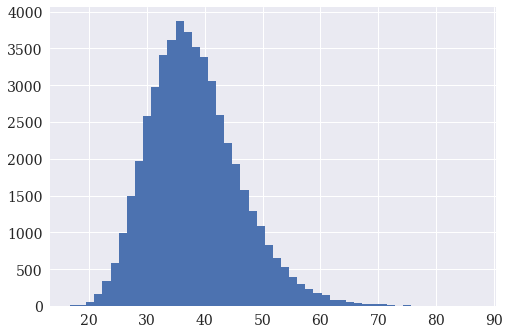

In [8]:
plt.hist(S[-1], bins=50)